# Graph Sampler class experiments

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from graph_em.graph.sampled import SampledGraph
from graph_em.graph.gabriel_graph import GabrielGraph

In [19]:
rg = np.random.RandomState(seed=42)
rg_initial_state = rg.get_state()

cluster_1 = rg.normal(0, 1, (100, 2))
cluster_2 = rg.normal(10, 1, (100, 2))
cluster_3 = rg.normal((10, 0), 1, (100, 2))
cluster_4 = rg.normal(6, 1, (100, 2))

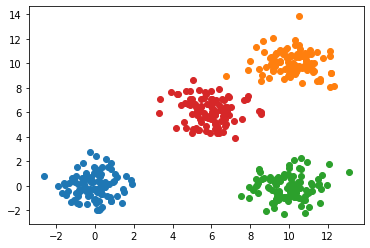

In [20]:
plt.scatter(cluster_1[:, 0], cluster_1[:, 1])
plt.scatter(cluster_2[:, 0], cluster_2[:, 1])
plt.scatter(cluster_3[:, 0], cluster_3[:, 1])
plt.scatter(cluster_4[:, 0], cluster_4[:, 1])

In [22]:
clusters = np.vstack([cluster_1, cluster_2, cluster_3, cluster_4])

In [23]:
graph = SampledGraph(clusters, random_generator=rg)

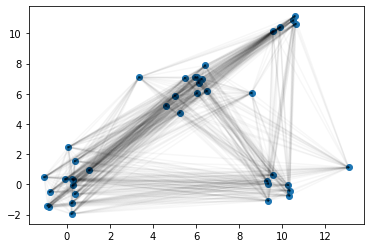

In [34]:
for edge in graph.edges:
    e = np.array(edge)
    plt.plot(e[:, 0], e[:, 1], 'k', alpha=0.03)

plt.scatter(graph._points[:, 0], graph._points[:, 1])

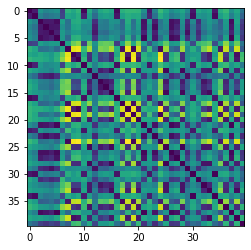

In [41]:
plt.imshow(graph.distances)

In [ ]:
gab_graph = GabrielGraph(clusters)

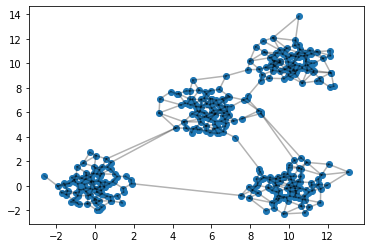

In [45]:
for edge in gab_graph.edges:
    e = np.array(edge)
    plt.plot(e[:, 0], e[:, 1], 'k', alpha=0.3)

plt.scatter(gab_graph._points[:, 0], gab_graph._points[:, 1])

## Elaboração do problema do Graph Sampler:

Dado um conjunto de pontos, e as distências entre todos, considere que desejamos $n$ pontos dessa amostra, de forma que eles estejam distribuídos mais "esparsamente" possível. Sendo assim, queremos um subconjunto de $n$ pontos cujas distâncias somadas sejam as maiores possíveis, dentre todas as somas de distâncias de todos os outros $n$ subconjuntos possíveis.

Sendo $X$ um conjunto de amostras, $X_n$ um subconjunto desse conjunto com $n$ amostras, $D_n$ uma matriz traingular inferior de dimensão $nxn$ que contém as distâncias entre todos os $n$ pontos entre si: 
    
$$
    f(D_n) = \sum D_n
$$

Definimos o problema de otimização:

$$
    X_n^* = \underset{D_n}{argmax} \; f(D_n)
$$